# SPRM Demo - Spatial Process & Relationship Modeling

This notebook provides a comprehensive demo of SPRM

## What this notebook does:

1. **Installs SPRM if needed** with all dependencies
2. **Runs the SPRM analysis** on demo data
3. **Displays results** with interactive visualizations

## Prerequisites:
- Download demo files from: https://drive.google.com/drive/folders/1denyZ1SFoWpWrPO9UbSdcF2DvHEv6ovN?usp=sharing
- Place `image_demo.ome.tiff` in the `img/` folder and `mask_demo.ome.tiff` in the `mask/` folder

## Step 1: Environment Setup and Installation

The following cell will:
- Install SPRM and all dependencies if needed
- Set up matplotlib backend for compatibility

**Note**: Jupyter notebooks automatically use the Python environment of the selected kernel. Make sure you're using a kernel with the SPRM environment activated.

In [2]:
import os
import sys
import subprocess
import importlib
from pathlib import Path

# Colors for output
class Colors:
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'

def print_status(message):
    print(f"{Colors.BLUE}[INFO]{Colors.ENDC} {message}")

def print_success(message):
    print(f"{Colors.GREEN}[SUCCESS]{Colors.ENDC} {message}")

def print_warning(message):
    print(f"{Colors.YELLOW}[WARNING]{Colors.ENDC} {message}")

def print_error(message):
    print(f"{Colors.RED}[ERROR]{Colors.ENDC} {message}")

def setup_notebook_environment():
    """Setup notebook environment for SPRM"""
    print_status("Setting up notebook environment...")
    
    # Check if we're in the right directory
    if not (Path("../setup.py").exists() and Path("../sprm").exists()):
        print_error("Please run this notebook from the demo directory")
        return False
    
    # Set matplotlib backend to avoid GUI issues
    os.environ['MPLBACKEND'] = 'Agg'
    print_status("Set matplotlib backend to Agg (non-GUI)")
    
    # Try to import SPRM
    try:
        import sprm
        print_success("SPRM is available in this kernel")
        return True
    except ImportError:
        print_warning("SPRM not found in this kernel")
        print_status("Installing SPRM from parent directory...")
        
        try:
            result = subprocess.run([
                sys.executable, "-m", "pip", "install", ".."
            ], cwd="..", capture_output=True, text=True, check=True)
            
            print_success("SPRM installed successfully!")
            
            # Try importing again
            import sprm
            print_success("SPRM import successful after installation")
            return True
            
        except subprocess.CalledProcessError as e:
            print_error(f"Failed to install SPRM: {e.stderr}")
            print_error("Please install SPRM manually: pip install ..")
            return False
        except ImportError as e:
            print_error(f"SPRM import failed after installation: {e}")
            return False

# Run the setup
if setup_notebook_environment():
    print_success("Notebook environment ready!")
    print_status("Note: This notebook uses the kernel's Python environment")
else:
    print_error("Environment setup failed. Please check the errors above.")


[INFO] Setting up notebook environment...
[INFO] Set matplotlib backend to Agg (non-GUI)
[SUCCESS] SPRM is available in this kernel
[SUCCESS] Notebook environment ready!
[INFO] Note: This notebook uses the kernel's Python environment


## Step 2: Check Demo Files and Run SPRM Analysis

The following cell will:
- Verify that demo files are present
- Run SPRM analysis with proper error handling
- Generate all output files and visualizations


In [3]:
def check_demo_files():
    """Check if demo files exist"""
    print_status("Checking for demo files...")
    
    # Check for image file in img/ subdirectory
    if not Path("img/image_demo.ome.tiff").exists():
        print_error("Demo image file 'img/image_demo.ome.tiff' not found!")
        print_error("Please download demo files from:")
        print_error("https://drive.google.com/drive/folders/1denyZ1SFoWpWrPO9UbSdcF2DvHEv6ovN?usp=sharing")
        print_error("and place them in the img/ and mask/ subdirectories")
        return False
    
    # Check for mask file in mask/ subdirectory
    if not Path("mask/mask_demo.ome.tiff").exists():
        print_error("Demo mask file 'mask/mask_demo.ome.tiff' not found!")
        print_error("Please download demo files from:")
        print_error("https://drive.google.com/drive/folders/1denyZ1SFoWpWrPO9UbSdcF2DvHEv6ovN?usp=sharing")
        print_error("and place them in the img/ and mask/ subdirectories")
        return False
    
    print_success("Demo files found in img/ and mask/ directories")
    return True

def run_sprm_analysis():
    """Run SPRM analysis on demo files"""
    print_status("Starting SPRM analysis...")
    
    # Create output directory
    output_dir = Path("sprm_demo_outputs")
    output_dir.mkdir(exist_ok=True)
    
    # Define SPRM command
    sprm_path = "../SPRM.py"
    cmd = [
        sys.executable, "-u", sprm_path,
        "--img-dir", "img/image_demo.ome.tiff",
        "--mask-dir", "mask/mask_demo.ome.tiff", 
        "--output-dir", "sprm_demo_outputs",
        "--processes", "1"
    ]
    
    print_status(f"Running command: {' '.join(cmd)}")
    
    try:
        # Run SPRM with real-time output
        process = subprocess.Popen(
            cmd,
            stdout=subprocess.PIPE,
            stderr=subprocess.STDOUT,
            text=True,
            bufsize=1,
            universal_newlines=True
        )
        
        # Print output in real-time
        for line in process.stdout:
            print(line.rstrip())
        
        process.wait()
        
        if process.returncode == 0:
            print_success("SPRM analysis completed successfully!")
            print_status("Results saved to: sprm_demo_outputs/")
            return True
        else:
            print_error(f"SPRM analysis failed with return code: {process.returncode}")
            return False
            
    except Exception as e:
        print_error(f"Error running SPRM: {e}")
        return False

# Check demo files and run analysis
if check_demo_files():
    if run_sprm_analysis():
        print_success("SPRM demo completed successfully!")
    else:
        print_error("SPRM analysis failed. Check the output above for details.")
else:
    print_error("Demo files not found. Please download and place them correctly.")


[INFO] Checking for demo files...
[SUCCESS] Demo files found in img/ and mask/ directories
[INFO] Starting SPRM analysis...
[INFO] Running command: /opt/anaconda3/envs/SPRM/bin/python -u ../SPRM.py --img-dir img/image_demo.ome.tiff --mask-dir mask/mask_demo.ome.tiff --output-dir sprm_demo_outputs --processes 1
SPRM R1.5.2-3-g1d44deaa75d7-dirty
Using 1 worker(s) with executor ThreadPoolExecutor
Reading in image and corresponding mask file...
Image name: image_demo.ome.tiff
Attempted file (/Users/tedzhang/Desktop/CMU/hubmap/SPRM/demo/img/image_demo.ome.tiff) load with reader: aicsimageio.readers.bfio_reader.OmeTiledTiffReader failed with error: No module named 'bfio'
Channel names:
['CD31', 'CD45', 'CD8', 'DAPI_2']
Attempted file (/Users/tedzhang/Desktop/CMU/hubmap/SPRM/demo/mask/mask_demo.ome.tiff) load with reader: aicsimageio.readers.bfio_reader.OmeTiledTiffReader failed with error: No module named 'bfio'
Channel names:
['cells', 'nuclei', 'cell_boundaries', 'nucleus_boundaries']
Calc

## Step 3: Display SPRM Results

The following cells will display the generated results:
- **PDF files**: Adjacency graphs and other visualizations
- **PNG images**: Cell clustering results and analysis plots
- **CSV data**: Feature tables and clustering assignments

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import IFrame

In [3]:
# Path to the PDF file
pdf_path = "sprm_demo_outputs/image_demo.ome.tiff_AdjacencyGraph.pdf"

# Display the PDF
IFrame(pdf_path, width=600, height=400)

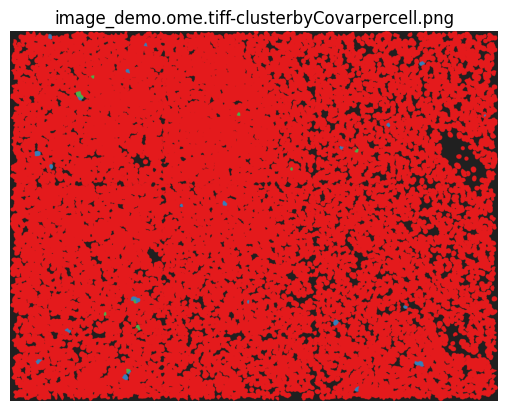

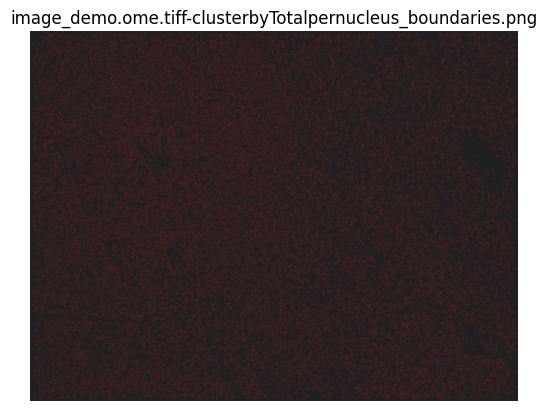

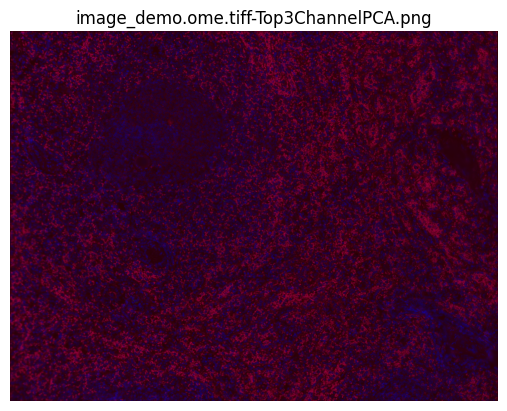

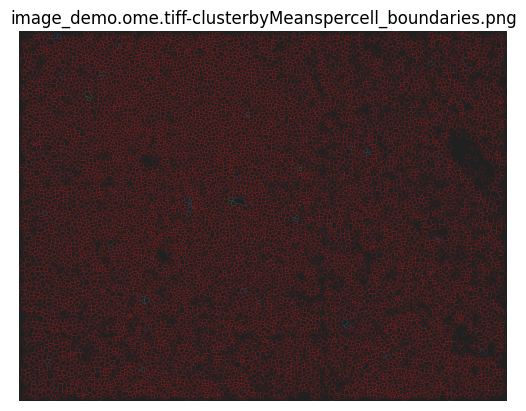

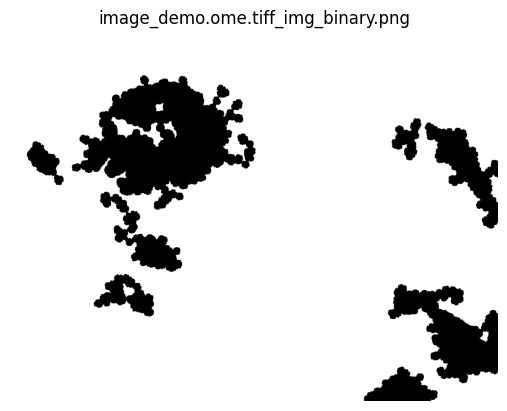

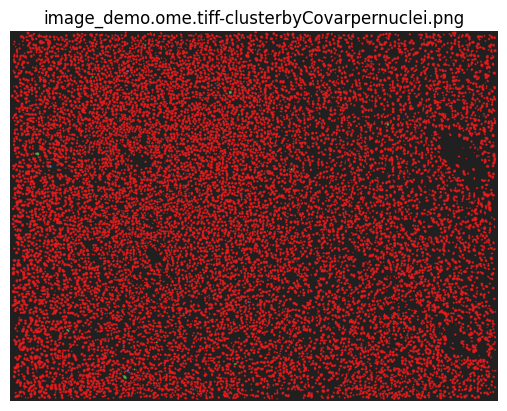

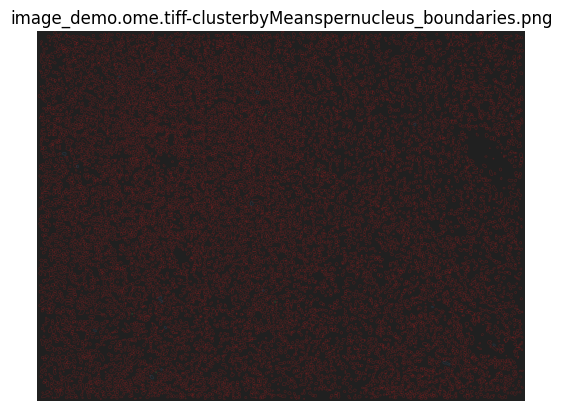

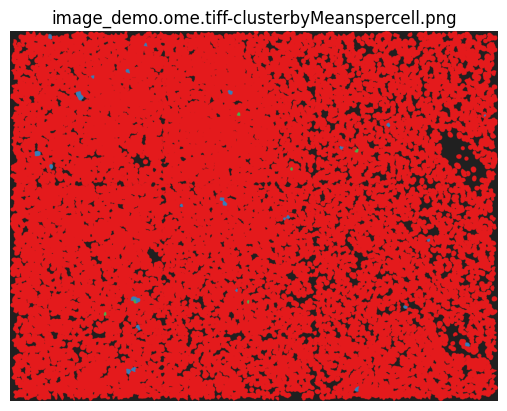

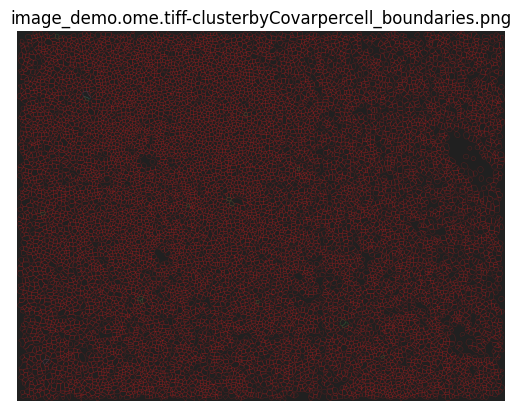

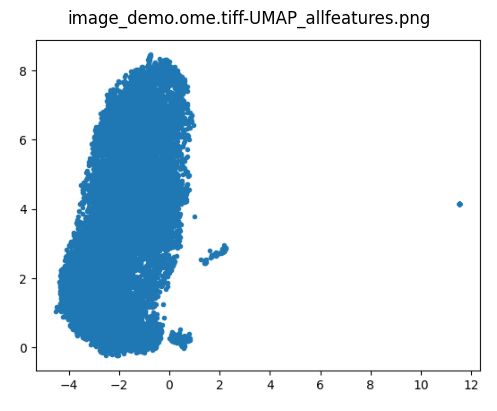

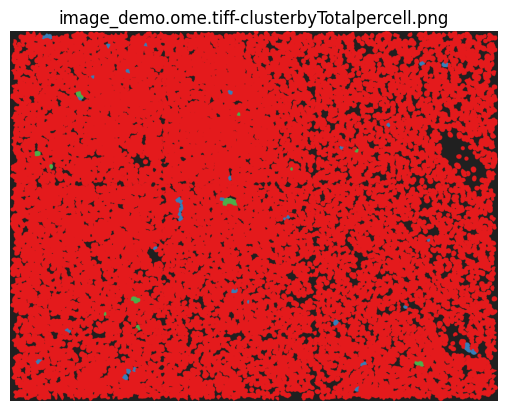

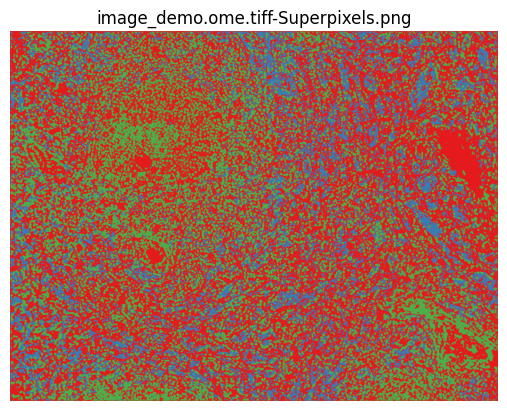

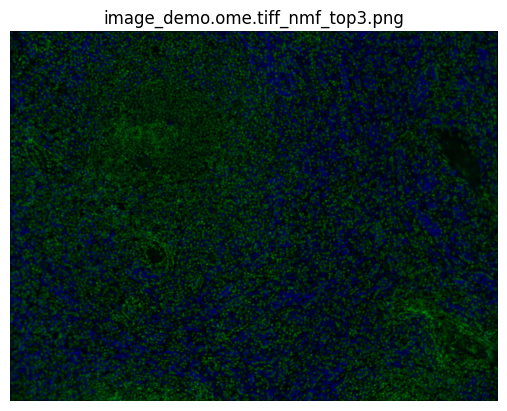

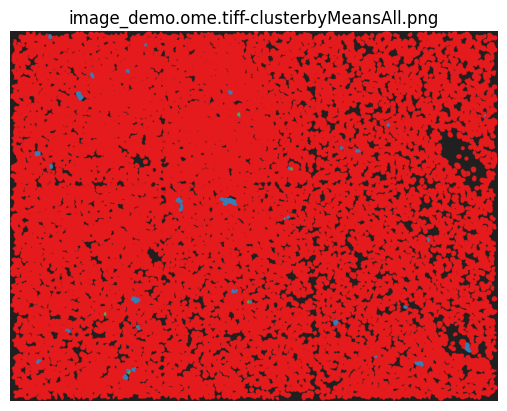

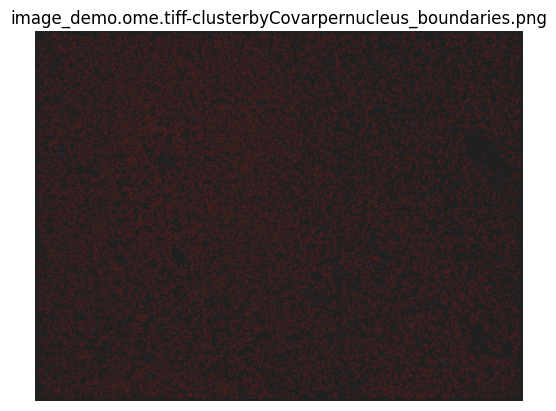

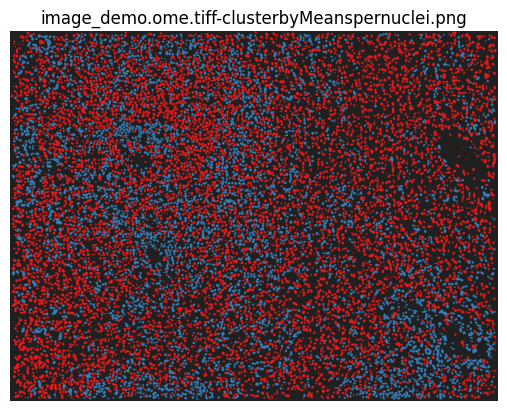

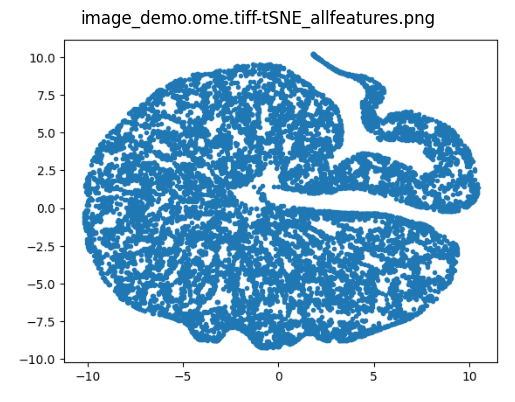

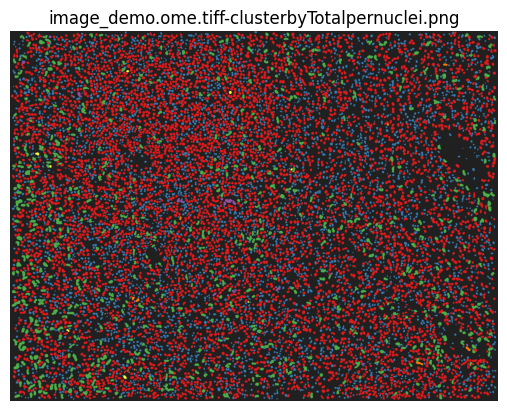

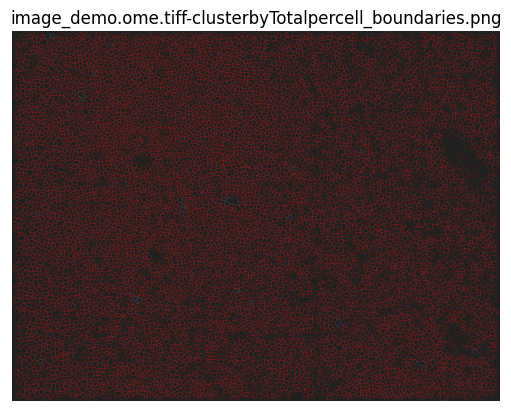

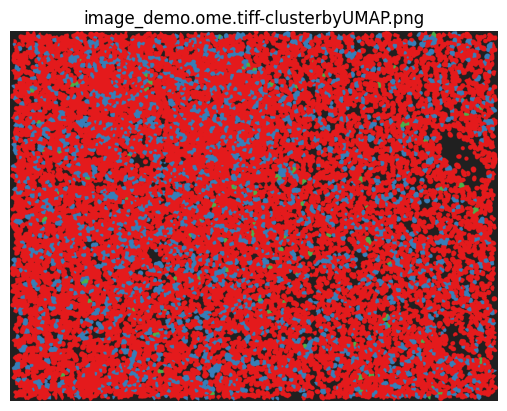

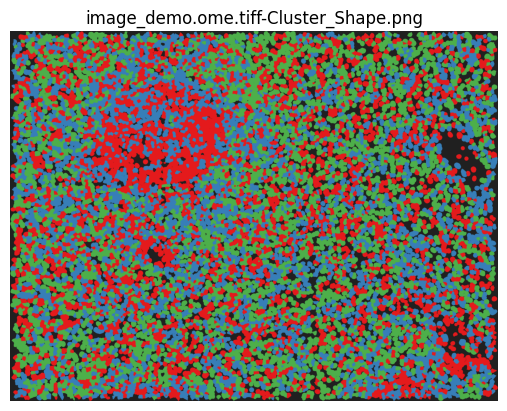

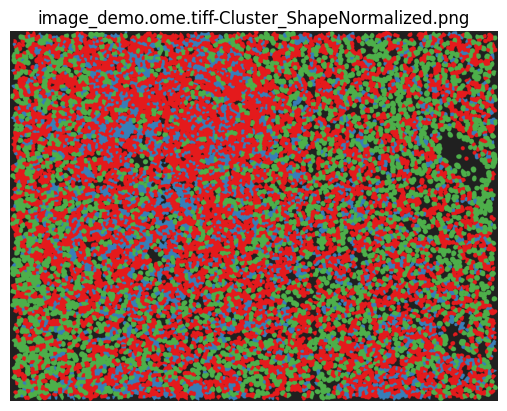

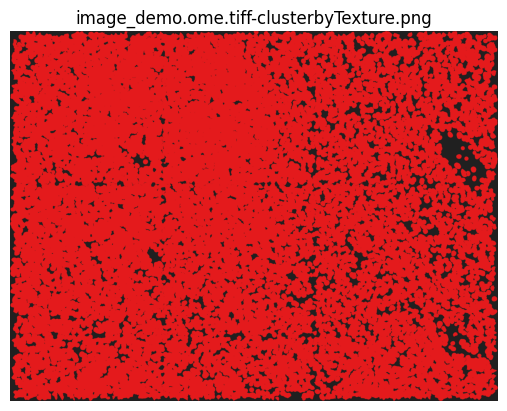

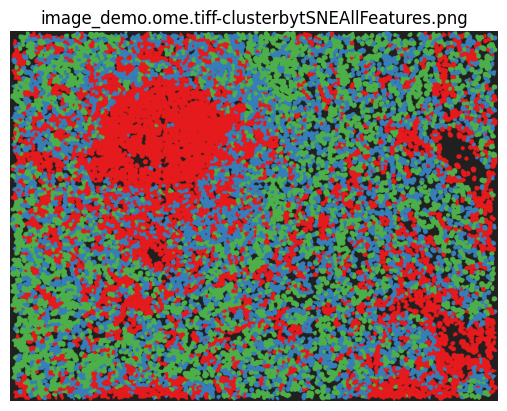

In [5]:
# Path to the folder containing the PNG images
folder_path = "sprm_demo_outputs"

# Get all files in the folder
files = os.listdir(folder_path)

# Filter PNG files
png_files = [file for file in files if file.endswith('.png')]

# Display the PNG images
for png_file in png_files:
    image_path = os.path.join(folder_path, png_file)
    image = Image.open(image_path)
    plt.figure()
    plt.imshow(image)
    plt.title(png_file)
    plt.axis('off')
    plt.show()